In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import torch
os.chdir('/content/drive/MyDrive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
with open('covtype3.pickle', 'rb') as f:
    covtype = pickle.load(f)

In [ ]:
from sklearn import tree
my_tree = tree.DecisionTreeClassifier(random_state=0)
my_tree.fit(covtype['train_data'], covtype['train_labels'])

DecisionTreeClassifier(random_state=0)

# Problem 2.1


## What is the default criterion used to measure the quality of a split? 

### The default criterion is "gini" for the Gini impurity. 

## What is the default stopping criterion used by the learning algorithm? If you wanted to ensure that the learned decision tree does not have more than 20 leaf nodes, how would you change the call to the DecisionTreeClassifier constructor?

### The default stopping criterion is when all leaves are pure or when all leaves contain less than 2 samples. To ensure that the learned decision tree does not have more than 20 leaf nodes, we set the option max_leaf_nodes =20 in the constructor.

## The following code is used to assess the quality of the learned decision tree, my_tree, on the training data and the test data


In [ ]:
from sklearn.metrics import classification_report
print('Performance on training data')
print(classification_report(covtype['train_labels'],
my_tree.predict(covtype['train_data']),
target_names=covtype['class_names']))
print('Performance on test data')
print(classification_report(covtype['test_labels'],
my_tree.predict(covtype['test_data']),
target_names=covtype['class_names']))

Performance on training data
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    164652
           2       1.00      1.00      1.00    218031
           3       1.00      1.00      1.00     33493
           4       1.00      1.00      1.00      8974
           5       1.00      1.00      1.00     13981
           6       1.00      1.00      1.00     19810
           7       1.00      1.00      1.00     22071

    accuracy                           1.00    481012
   macro avg       1.00      1.00      1.00    481012
weighted avg       1.00      1.00      1.00    481012

Performance on test data
              precision    recall  f1-score   support

           1       0.84      0.82      0.83     34044
           2       0.85      0.85      0.85     45223
           3       0.67      0.68      0.68      7023
           4       0.16      0.18      0.17      1867
           5       0.37      0.40      0.38      2935
           6       0.51 

# Problem 2.2. What is the training error rate of the learned decision tree my_tree? And what is the test error rate of the learned decision tree my_tree?

## The training error rate is 0 (because 'accruacy' is 1.0), and the test error rate is 1-0.78 = 0.22.

# 2.2 Examine the structure of the learned decision tree

Using the code below to visually display the learned decision tree, my_tree.

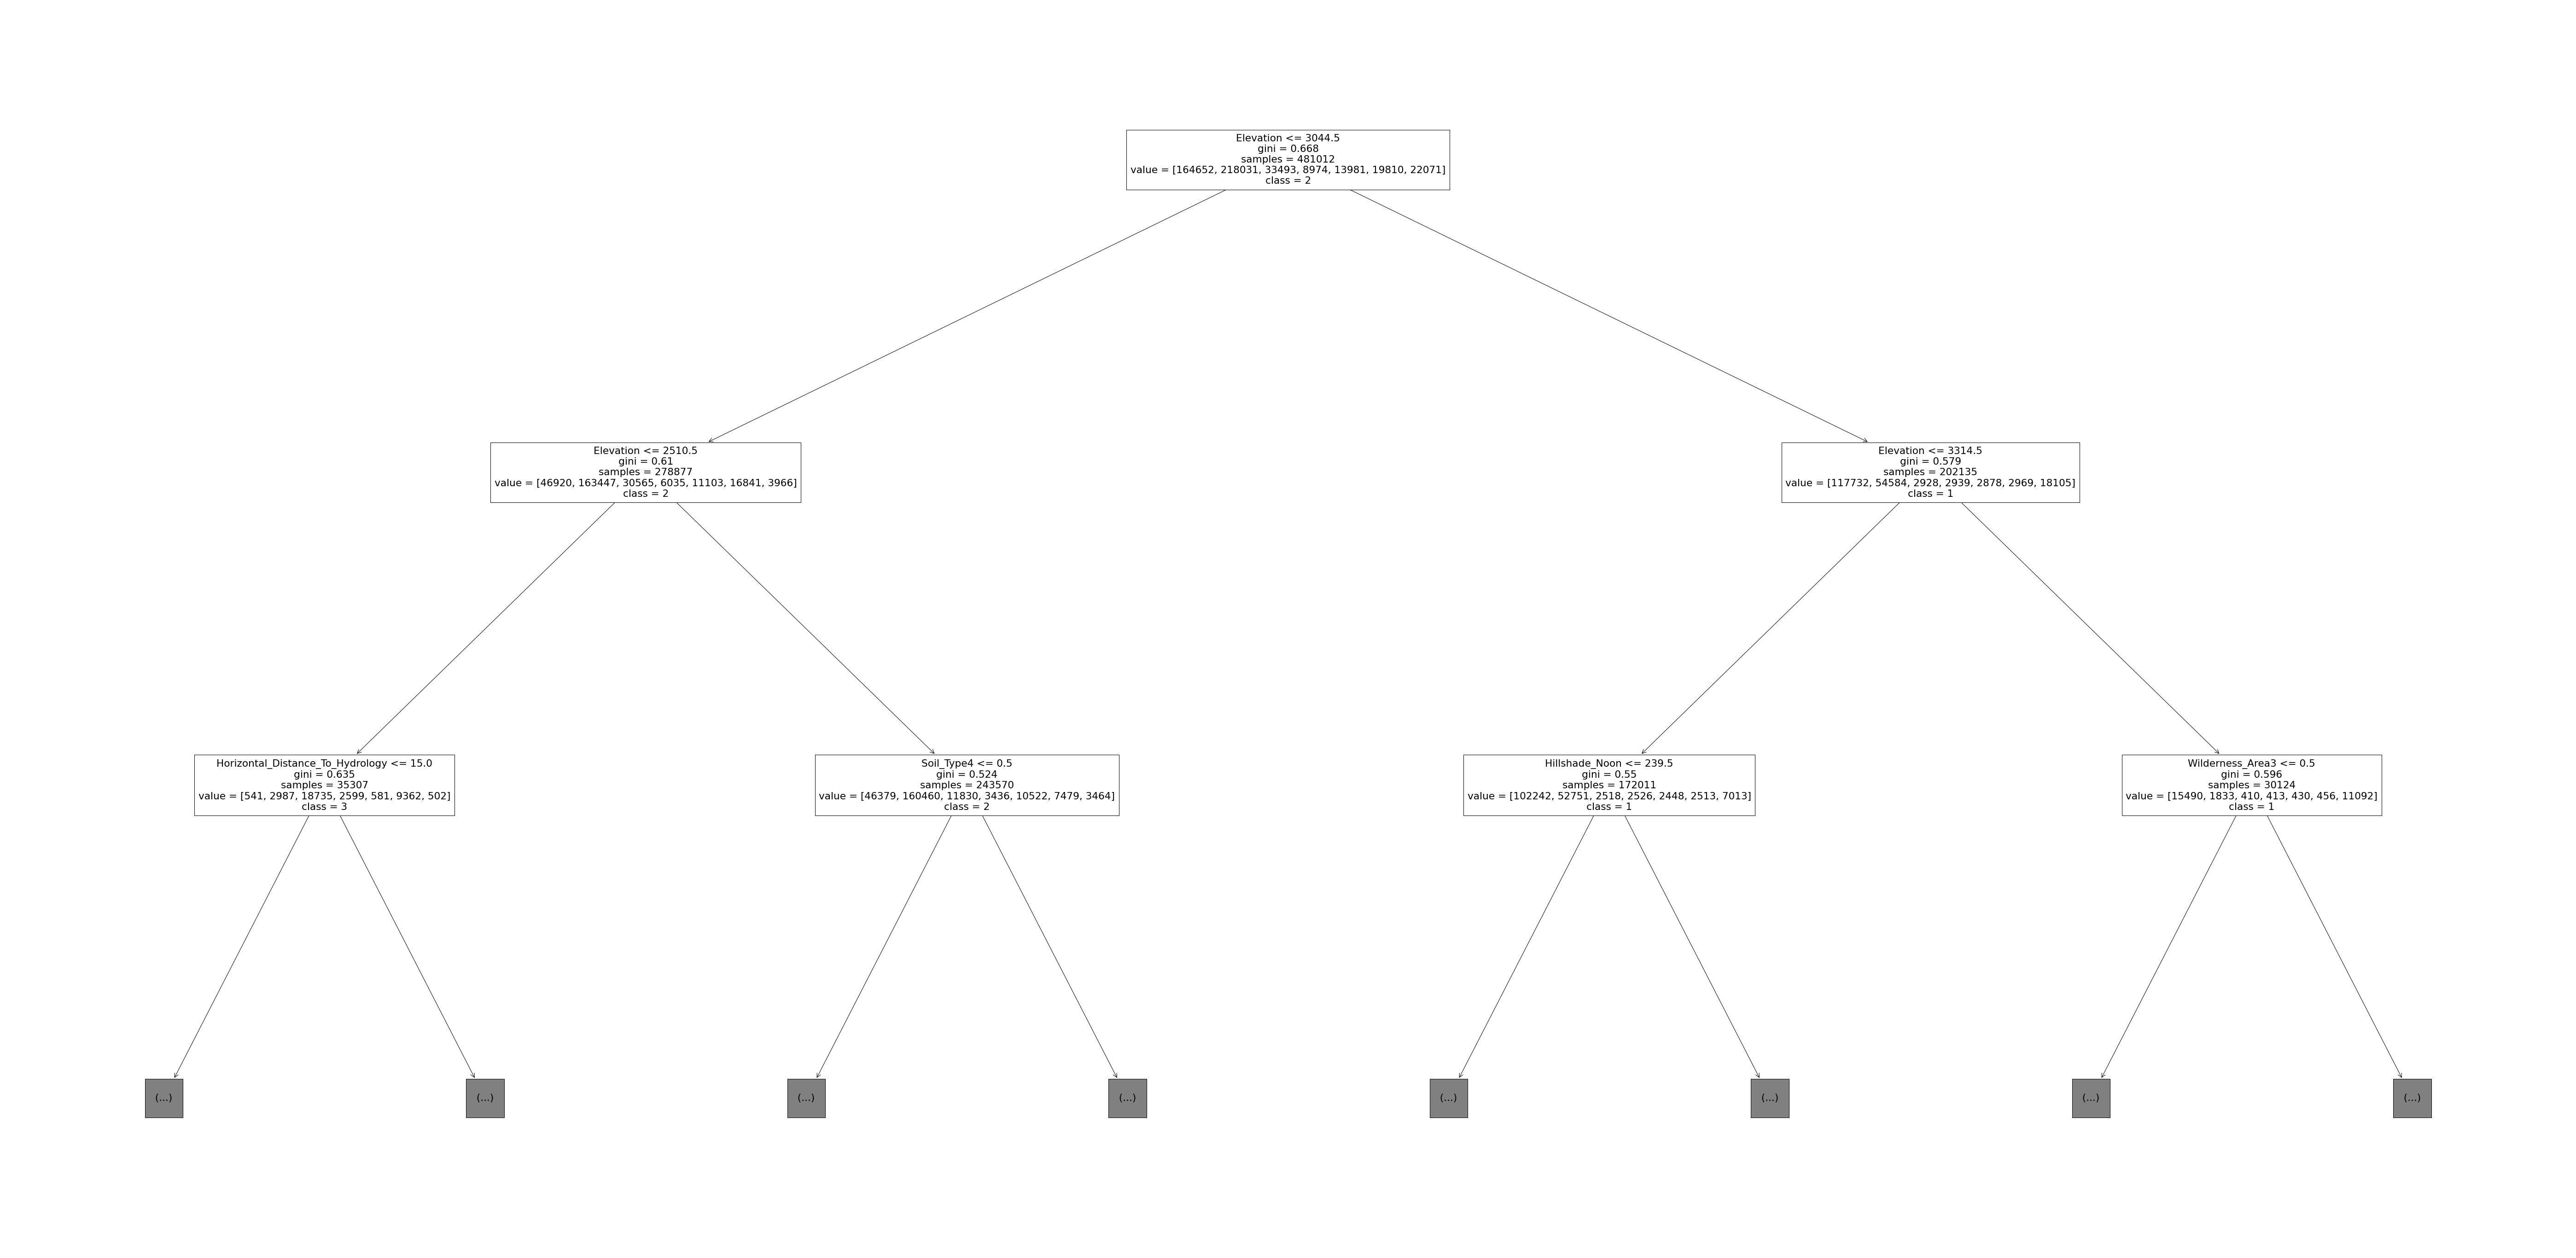

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(100, 50))
tree.plot_tree(my_tree,
                max_depth=2,
                class_names=covtype['class_names'],
                feature_names=covtype['feature_names'])
plt.show()

In [ ]:

node_depth = np.zeros(shape=my_tree.tree_.node_count, dtype=np.int64)
stack = [(0, 0)]
while len(stack) > 0:
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    if my_tree.tree_.children_left[node_id] != my_tree.tree_.children_right[node_id]:
        stack.append((my_tree.tree_.children_left[node_id], depth + 1))
        stack.append((my_tree.tree_.children_right[node_id], depth + 1))

# Problem 2.3 

*   What is the maximum depth of the learned decision tree, my_tree? 
*   how many nodes are at that depth?
*   Which depth has the most number of nodes in my_tree?

In [ ]:
print("the max depth of the learned decision tree is :")
print(node_depth.max())

print("Number of nodes at the max depth:")
print(len([x for x in node_depth if x == 63]))
print(node_depth)

print("Depth that has most number of nodes:")
count = np.bincount(node_depth)               #counts the occurrence of each element
max_count_depth = np.argmax(count)
print(max_count_depth)

the max depth of the learned decision tree is :
63
Number of nodes at the max depth:
2
[ 0  1  2 ... 13 14 14]
Depth that has most number of nodes:
22


# Use cross-validation to choose a hyperparameter value

## Problem 2.4. Use hold-out cross-validation to pick a value for the “maximum depth” hyperparameter. (You may want to use sklearn.metrics.accuracy_score, and also save some of the intermediate results for Problem 2.6 below.) What is the chosen hyperparameter value?

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(covtype['train_data'],
                                                  covtype['train_labels'], test_size=0.2, random_state=0)
max_depths = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
accuracy_scores = {}

In [ ]:
for chosen_max_depth in max_depths:
    CV_tree = tree.DecisionTreeClassifier(max_depth = chosen_max_depth, random_state=0)
    CV_tree.fit(X_train, y_train)
    accuracy_scores[chosen_max_depth] = accuracy_score(y_val, CV_tree.predict(X_val))  
    #y_val and CV_tree.predict(X_Val))
    # evaluate model
	#yhat = model.predict(test_X)
	#acc = accuracy_score(test_y, yhat)

In [ ]:
accuracy_scores

{5: 0.6500005197343118,
 10: 0.716266644491336,
 15: 0.7722836086192738,
 20: 0.800640312672162,
 25: 0.8001725517915241,
 30: 0.7865347234493727,
 35: 0.7769716121118884,
 40: 0.7717742689936904,
 45: 0.769768094550066,
 50: 0.768219286300843}

According to the accuracy scores, the chosen max depth is **20.**

## Problem 2.5. Use matplotlib (or any other plotting software with sufficient capabilities) to plot the validation accuracy (or validation error rate, if you prefer) as a function of the “maximum depth” hyperparameter value. Label the axes of the plot and give the plot an appropriate title. Please include this plot in your write-up.

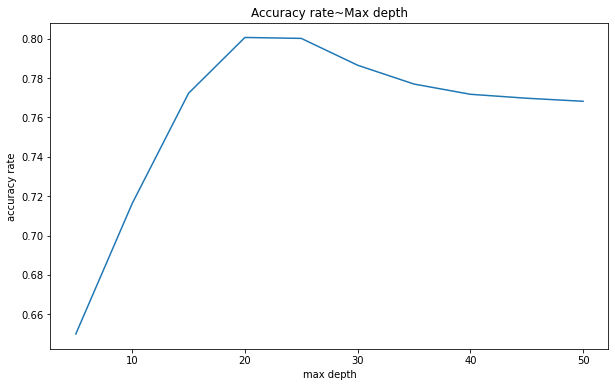

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = list(accuracy_scores.keys()), y = list(accuracy_scores.values()),ax = ax);
ax.set_ylabel("accuracy rate");
ax.set_xlabel("max depth");
ax.set_title("Accuracy rate~Max depth");

## Problem 2.6. Now use the value for the “maximum depth” hyperparameter chosen in Problem 2.4 to learn another decision tree, using the entirety of the training data (covtype[’train_data’] and covtype[’train_labels’], not just X_train and y_train). What is the test error rate of this new learned decision tree?

In [ ]:
CV_tree = tree.DecisionTreeClassifier(max_depth = 20, random_state=0)
CV_tree.fit(covtype['train_data'], covtype['train_labels'])
accuracy_score(covtype['test_labels'],CV_tree.predict(covtype['test_data']))

0.8058

# Problem 4.2. 

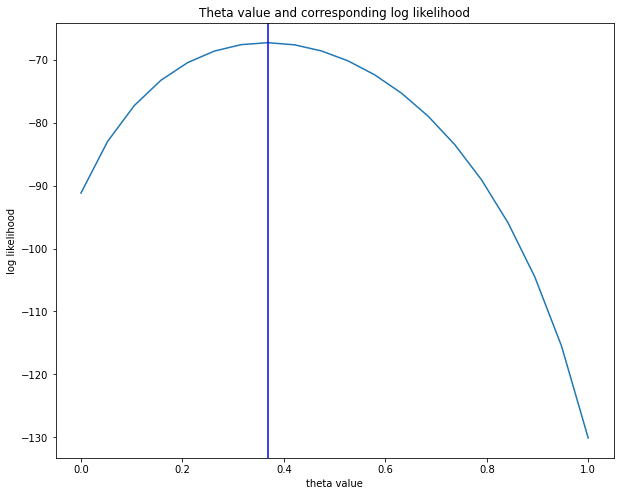

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

thetas = np.linspace(0,1,20) #20 represents????
log_likelihood = [40*np.log(0.75*theta+1/8)+60*np.log(-0.75*theta + 7/8) for theta in thetas]
log_likelihood = np.array(log_likelihood)
best_theta = thetas[np.argmax(log_likelihood)]

fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(x = thetas, y = log_likelihood,ax = ax);
ax.set_ylabel("log likelihood");
ax.set_xlabel("theta value");
ax.set_title("Theta value and corresponding log likelihood");
plt.axvline(x = best_theta , color = 'b', label = 'Best theta value')